# Data Manipulation work with pandas
---
## Öğreneceğimiz Alt Başlıklar
1. Transforming DataFrames
2. Aggregating DataFrames
3. Slicing and Indexing DataFrames
4. Creating and Visualizing DataFrames
---
## Veri Setlerini Tanıyalım
- avocado: Yıllara göre satılan avokado sayılarını içeren bir veri setidir.
- homelessness: Her ABD eyaletindeki evsizlik tahminlerini içeren bir veri setidir.
- temperatures: Dünyanın dört bir yanındaki şehirlerdeki ortalama sıcaklıkları içeren bir veri setidir. 
- walmart: Her mağaza türünde yapılan toplam benzin satışları içeren bir veri setidir.
---
### *homelessness veri setini tanıyalım*
> *Sütun isimlerine ve bunları ne için kullanacağımıza bakalım*
* region: bölge
* state: eyalet
* individuals: bireysel, çocuklu bir ailenin parçası olmayan evsiz bireylerin sayısıdır.
* family_members: çocuklu bir ailenin parçası olan evsiz bireylerin sayısıdır.
* state_pop: eyaletin toplam nüfusu
---
### *walmart veri setini tanıyalım*
> *Sütun isimlerine ve bunları ne için kullanacağımıza bakalım*
* store: mağaza 
* type: tür, tip
* department: departman, bölüm
* date: tarih
* weekly_sales: haftalık satışlar
* is_holiday: tatil mi? durumu
* temperature_c: sıcaklık (santigrat)
* fuel_price_usd_per_l: litre başına benzin fiyatları
* unemployment: işsizlik
---
### *avocado veri setini tanıyalım*
> *Sütun isimlerine ve bunları ne için kullanacağımıza bakalım*
* date: tarih
* type: tür
* year: yıl
* avg_price: ortalama fiyat
* size: boyutu
* nb_sold: satılan avokado sayısı
---
### *temperatures veri setini tanıyalım*
> *Sütun isimlerine ve bunları ne için kullanacağımıza bakalım*
* date: tarih
* city: şehir
* country: ülke
* avg_temp_c: ortalama sıcaklık (santigrat)
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
avocado = pd.read_pickle("../input/datamanipulationwithpandas/avoplotto.pkl")
homelessness = pd.read_csv("../input/datamanipulationwithpandas/homelessness.csv")
temperatures = pd.read_csv("../input/datamanipulationwithpandas/temperatures.csv")
walmart = pd.read_csv("../input/datamanipulationwithpandas/sales_subset.csv")

---
#### *Evet ilk alt başlığımız olan "Transforming DataFrames" ile başlayalım. Bu konu için "homelessness" adlı veri setini kullanacağız. Hazırsanız başlıyoruz.*
---

In [3]:
# "Unnamed: 0" adlı sütunu kaldıralım, o işimize yaramayacak gereksiz bir sütun
homelessness.drop('Unnamed: 0', inplace=True, axis=1)

# Evsizlik (homelessness) verisinin ilk 5 verisine bakalım
homelessness.head()

,region,state,individuals,family_members,state_pop
0,East South Central,Alabama,2570.0,864.0,4887681
1,Pacific,Alaska,1434.0,582.0,735139
2,Mountain,Arizona,7259.0,2606.0,7158024
3,West South Central,Arkansas,2280.0,432.0,3009733
4,Pacific,California,109008.0,20964.0,39461588


In [4]:
# homelessness verisi hakkında bilgi edinelim biraz
homelessness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   region          51 non-null     object 
 1   state           51 non-null     object 
 2   individuals     51 non-null     float64
 3   family_members  51 non-null     float64
 4   state_pop       51 non-null     int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 2.1+ KB


In [5]:
# homelessness verisinin shape'ine (boyut bilgisine) bakalım. 
homelessness.shape

(51, 5)

In [6]:
# describe() ile Elimizdeki homelessness verisinin hızlı bir şekilde özet istatistiksel bilgilerine erişelim
# .T ile transpozunu alalım (yani satır ve sütunları yer değiştirelim) ve böylece daha rahat okuyabilelim
homelessness.describe().T

,count,mean,std,min,25%,50%,75%,max
individuals,51.0,7.225784e+03,1.599103e+04,434.0,1446.5,3082.0,6781.5,109008.0
family_members,51.0,3.504882e+03,7.805412e+03,75.0,592.0,1482.0,3196.0,52070.0
state_pop,51.0,6.405637e+06,7.327258e+06,577601.0,1777413.5,4461153.0,7340946.5,39461588.0


In [7]:
# homelessness veri setindeki değerlere bakalım
homelessness.values

array([['East South Central', 'Alabama', 2570.0, 864.0, 4887681],
       ['Pacific', 'Alaska', 1434.0, 582.0, 735139],
       ['Mountain', 'Arizona', 7259.0, 2606.0, 7158024],
       ['West South Central', 'Arkansas', 2280.0, 432.0, 3009733],
       ['Pacific', 'California', 109008.0, 20964.0, 39461588],
       ['Mountain', 'Colorado', 7607.0, 3250.0, 5691287],
       ['New England', 'Connecticut', 2280.0, 1696.0, 3571520],
       ['South Atlantic', 'Delaware', 708.0, 374.0, 965479],
       ['South Atlantic', 'District of Columbia', 3770.0, 3134.0, 701547],
       ['South Atlantic', 'Florida', 21443.0, 9587.0, 21244317],
       ['South Atlantic', 'Georgia', 6943.0, 2556.0, 10511131],
       ['Pacific', 'Hawaii', 4131.0, 2399.0, 1420593],
       ['Mountain', 'Idaho', 1297.0, 715.0, 1750536],
       ['East North Central', 'Illinois', 6752.0, 3891.0, 12723071],
       ['East North Central', 'Indiana', 3776.0, 1482.0, 6695497],
       ['West North Central', 'Iowa', 1711.0, 1038.0, 3148618]

In [8]:
# homelessness veri setindeki sütun isimlerine bakalım
homelessness.columns

Index(['region', 'state', 'individuals', 'family_members', 'state_pop'], dtype='object')

In [9]:
# homelessness veri setindeki index bilgisine bakalım
homelessness.index

RangeIndex(start=0, stop=51, step=1)

In [10]:
# Verimizi ailesi olmayan evsiz bireye (individuals) göre sıralayalım
homelessness_ind = homelessness.sort_values("individuals")

# Çıktıya dikkat ettiyseniz individuals sütunundaki değerler artan olacak şekilde sıralandı
homelessness_ind.head()

,region,state,individuals,family_members,state_pop
50,Mountain,Wyoming,434.0,205.0,577601
34,West North Central,North Dakota,467.0,75.0,758080
7,South Atlantic,Delaware,708.0,374.0,965479
39,New England,Rhode Island,747.0,354.0,1058287
45,New England,Vermont,780.0,511.0,624358


In [11]:
# Verimizi azalan aile üyelerine göre sıralayalım
# azalan olması için ascending= False yapacağız
homelessness_fam = homelessness.sort_values("family_members",ascending=False)

# Çıktıya dikkat ettiyseniz family_members sütunundaki değerler azalan olacak şekilde sıralandı
homelessness_fam.head()

,region,state,individuals,family_members,state_pop
32,Mid-Atlantic,New York,39827.0,52070.0,19530351
4,Pacific,California,109008.0,20964.0,39461588
21,New England,Massachusetts,6811.0,13257.0,6882635
9,South Atlantic,Florida,21443.0,9587.0,21244317
43,West South Central,Texas,19199.0,6111.0,28628666


In [12]:
# Verimizi bölgeye göre sıralayalım, ardından family_members'i azalan şekilde sıralayalım
homelessness_reg_fam = homelessness.sort_values(["region",
"family_members"],ascending=[True,False])
# ascending=[True,False] ilk ifadeyi artan şekilde, ikinci ifadeyi azalan şekilde sıralar

# Çıktıya dikkat ettiyseniz family_members sütunundaki değerler azalan olacak şekilde sıralandı 
# ve bölgelerde kendi içinde artan sıralı (alfabetik olarak) bir şekilde geldi
homelessness_reg_fam.head()

,region,state,individuals,family_members,state_pop
13,East North Central,Illinois,6752.0,3891.0,12723071
35,East North Central,Ohio,6929.0,3320.0,11676341
22,East North Central,Michigan,5209.0,3142.0,9984072
49,East North Central,Wisconsin,2740.0,2167.0,5807406
14,East North Central,Indiana,3776.0,1482.0,6695497


### *Küçük Bir Dipnot!*
---
```
individuals = homelessness[['individuals']]
```
#### *Bu ifadede neden 2 köşeli parantez içine alıyoruz?* 
##### *Çünkü biz çıktımızın DataFrame olarak gözükmesini istiyoruz.* 
> *Tek köşeli parantez kullanırsak Pandas Series olarak gelir, çift köşeli parantez de ise Pandas DataFrame olarak geliyor.*

In [13]:
# Kişiler sütununu seçin Verimizdeki 'individuals' sütununu seçip bunu individuals adlı yeni bir değişkene atalım
individuals = homelessness[['individuals']]

# Sonucun ilk beş satırını yazdırıp bakalım
individuals.head()

,individuals
0,2570.0
1,1434.0
2,7259.0
3,2280.0
4,109008.0


In [14]:
# state ve family_members sütunlarını seçip bunları yeni bir değişkene atalım
state_fam = homelessness[['state','family_members']]

# Sonucun ilk beş satırını yazdırıp bakalım
state_fam.head()

,state,family_members
0,Alabama,864.0
1,Alaska,582.0
2,Arizona,2606.0
3,Arkansas,432.0
4,California,20964.0


In [15]:
# individuals ve state sütunlarını seçip bunları yeni bir değişkene atalım
ind_state = homelessness[['individuals','state']]

# Sonucun son beş satırını yazdırıp bakalım
ind_state.tail()

,individuals,state
46,3928.0,Virginia
47,16424.0,Washington
48,1021.0,West Virginia
49,2740.0,Wisconsin
50,434.0,Wyoming


In [16]:
# "individuals" değerlerinin 10000'den büyük olduğu satırları filtreleyelim ve bunu yeni bir değişkene atalım
ind_gt_10k = homelessness[homelessness["individuals"] > 10000]

# Sonucu görelim
print(ind_gt_10k)

                region       state  individuals  family_members  state_pop
4              Pacific  California     109008.0         20964.0   39461588
9       South Atlantic     Florida      21443.0          9587.0   21244317
32        Mid-Atlantic    New York      39827.0         52070.0   19530351
37             Pacific      Oregon      11139.0          3337.0    4181886
43  West South Central       Texas      19199.0          6111.0   28628666
47             Pacific  Washington      16424.0          5880.0    7523869


In [17]:
# Region sütun değerinin "Mountain" olduğu satırları filtreleyip bunu yeni bir değişkene atalım
mountain_reg = homelessness[homelessness['region'] == "Mountain"]

# Sonucu görelim
print(mountain_reg)

      region       state  individuals  family_members  state_pop
2   Mountain     Arizona       7259.0          2606.0    7158024
5   Mountain    Colorado       7607.0          3250.0    5691287
12  Mountain       Idaho       1297.0           715.0    1750536
26  Mountain     Montana        983.0           422.0    1060665
28  Mountain      Nevada       7058.0           486.0    3027341
31  Mountain  New Mexico       1949.0           602.0    2092741
44  Mountain        Utah       1904.0           972.0    3153550
50  Mountain     Wyoming        434.0           205.0     577601


In [18]:
# family_members'ın 1000'den küçük olduğu ve bölgenin "Pasific" olduğu satırları filtreleyip bunları 
# yeni bir değişkene atalım
fam_lt_1k_pac = homelessness[(homelessness["region"] == "Pacific") & (homelessness["family_members"] < 1000)]

# Sonucu görelim
print(fam_lt_1k_pac)

    region   state  individuals  family_members  state_pop
1  Pacific  Alaska       1434.0           582.0     735139


### Bilgi Notu!
- *isin(): Bu fonksiyon, belirli bir sütunda belirli bir değere sahip satırların seçilmesine yardımcı olur.*

In [19]:
# South Atlantic veya Mid-Atlantic bölgelerindeki satırlar için alt küme oluşturalım. 
# Bunun için isin() ile filtreleme yapalım
south_mid_atlantic = homelessness[homelessness["region"].isin(["South Atlantic","Mid-Atlantic"])]

# Sonucu görelim
print(south_mid_atlantic)

            region                 state  individuals  family_members  \
7   South Atlantic              Delaware        708.0           374.0   
8   South Atlantic  District of Columbia       3770.0          3134.0   
9   South Atlantic               Florida      21443.0          9587.0   
10  South Atlantic               Georgia       6943.0          2556.0   
20  South Atlantic              Maryland       4914.0          2230.0   
30    Mid-Atlantic            New Jersey       6048.0          3350.0   
32    Mid-Atlantic              New York      39827.0         52070.0   
33  South Atlantic        North Carolina       6451.0          2817.0   
38    Mid-Atlantic          Pennsylvania       8163.0          5349.0   
40  South Atlantic        South Carolina       3082.0           851.0   
46  South Atlantic              Virginia       3928.0          2047.0   
48  South Atlantic         West Virginia       1021.0           222.0   

    state_pop  
7      965479  
8      701547  
9 

In [20]:
# ailesi olmayan evsizler ("individuals") ile ailesi olan evsizleri ("family_members") toplayıp bunları 
# "total" adındaki yeni bir sütun değişkenine atalım
homelessness['total'] = homelessness["individuals"] + homelessness["family_members"]

# ailesi olmayan evsizleri ("individuals"), toplam evsiz sayısına ("total") bölelim ve bu 
#yeni değerleri p_individuals adlı yeni bir sütuna ekleyelim
homelessness['p_individuals'] = homelessness["individuals"] / homelessness["total"] 

# Artık 2 yeni sütun değerimiz var.
# p_individuals: ailesi olmayan evsizlerin tüm evsizler içindeki oranını 
# total: tüm evsizlerin sayısını
# bize verir.

# Sonucumuzu görelim
homelessness # print(homelessness) ile de görebilirsiniz

,region,state,individuals,family_members,state_pop,total,p_individuals
0,East South Central,Alabama,2570.0,864.0,4887681,3434.0,0.748398
1,Pacific,Alaska,1434.0,582.0,735139,2016.0,0.711310
2,Mountain,Arizona,7259.0,2606.0,7158024,9865.0,0.735834
3,West South Central,Arkansas,2280.0,432.0,3009733,2712.0,0.840708
4,Pacific,California,109008.0,20964.0,39461588,129972.0,0.838704
5,Mountain,Colorado,7607.0,3250.0,5691287,10857.0,0.700654
6,New England,Connecticut,2280.0,1696.0,3571520,3976.0,0.573441
7,South Atlantic,Delaware,708.0,374.0,965479,1082.0,0.654344
8,South Atlantic,District of Columbia,3770.0,3134.0,701547,6904.0,0.546060
9,South Atlantic,Florida,21443.0,9587.0,21244317,31030.0,0.691041


In [21]:
# Ailesi olmayan evsiz bireyleri ('individuals'), eyaletin toplam nüfusuna ('state_pop') bölerek onların 
# eyaletteki nüfusa göre oranlarını bulalım ve bunu "indiv_per_10k" adlı yeni bir sütun değişkenine atalım
homelessness["indiv_per_10k"] = 10000 * homelessness['individuals'] / homelessness['state_pop']

# indiv_per_10k" adlı yeni sütun değişkeninde 20'den büyük olan değerleri bulalım ve bunları 
# "high_homelessness" adlı değişkene atalım
high_homelessness = homelessness[homelessness['indiv_per_10k'] > 20]

# indiv_per_10k değerine göre yüksek evsizlik oranını kendi içinde sıralayalım ve bunu da 
# "high_homelessness_srt" adlı yeni bir değişkene atalım
high_homelessness_srt = high_homelessness.sort_values("indiv_per_10k",ascending=False)

# high_homeless_srt'den eyalet ('state') ve indiv_per_10k sütunlarını seçip bunu "result" adlı değişkene atalım
result = high_homelessness_srt[['state','indiv_per_10k']]

# Sonucu görelim
result # print(result) ifadesini de kullanabilirsiniz

,state,indiv_per_10k
8,District of Columbia,53.738381
11,Hawaii,29.079406
4,California,27.623825
37,Oregon,26.636307
28,Nevada,23.314189
47,Washington,21.829195
32,New York,20.392363


### *Bölgelere göre ailesi olmayan evsiz insan sayısına ("individuals") bir çubuk grafik (bar plot) ile bakalım*

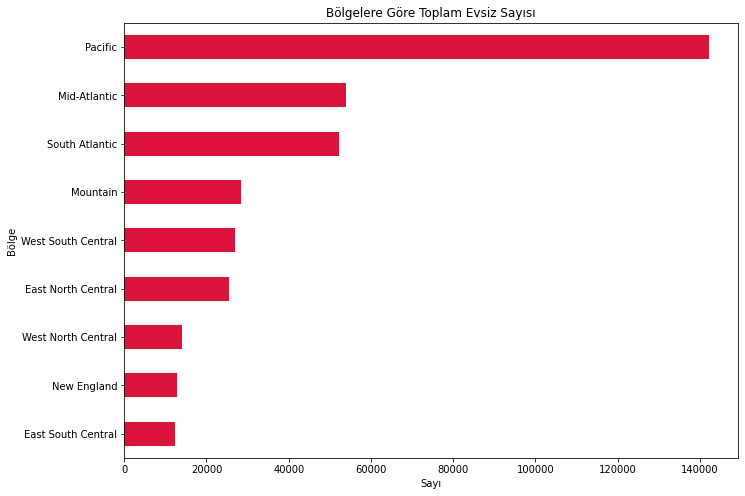

In [22]:
plt.figure(figsize= (11, 8))

# individuals: her bölge için ailesi olmayan evsiz bireylerin toplamını alıp bu değerleri sıralayalım
# sort_values(): değerleri sıralamak için
# sum(): toplama için
homelessness_by_region = (
    homelessness.groupby("region")["individuals"].sum().sort_values()
)

# Grafiği barplot olarak ayarlayıp h ile horizontal (yatay) yapalım --> kind= "barh"
homelessness_by_region.plot(kind="barh", color="crimson")

plt.title("Bölgelere Göre Toplam Evsiz Sayısı")
plt.xlabel("Sayı")
plt.ylabel("Bölge")
plt.show()

---
#### *Evet ikinci alt başlığımız olan "Aggregating DataFrames" ile devam edelim. Bu konu için "walmart" adlı veri setini kullanacağız.*
---

In [23]:
# "Unnamed: 0" adlı sütunu kaldıralım, o işimize yaramayacak gereksiz bir sütun
walmart.drop('Unnamed: 0', inplace=True, axis=1)

# walmart verisinin son 5 verisine bakalım
walmart.tail()

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
10769,39,A,99,2011-12-09,895.00,False,9.644444,0.834256,7.716
10770,39,A,99,2012-02-03,350.00,False,15.938889,0.887619,7.244
10771,39,A,99,2012-06-08,450.00,False,27.288889,0.911922,6.989
10772,39,A,99,2012-07-13,0.06,False,25.644444,0.860145,6.623
10773,39,A,99,2012-10-05,915.00,False,22.250000,0.955511,6.228


In [24]:
# walmart verisi hakkında bilgi edinelim biraz
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10774 entries, 0 to 10773
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   store                 10774 non-null  int64  
 1   type                  10774 non-null  object 
 2   department            10774 non-null  int64  
 3   date                  10774 non-null  object 
 4   weekly_sales          10774 non-null  float64
 5   is_holiday            10774 non-null  bool   
 6   temperature_c         10774 non-null  float64
 7   fuel_price_usd_per_l  10774 non-null  float64
 8   unemployment          10774 non-null  float64
dtypes: bool(1), float64(4), int64(2), object(2)
memory usage: 684.0+ KB


In [25]:
# Haftalık satışların ortalamasını yazdıralım
print(walmart["weekly_sales"].mean())

23843.95014850566


In [26]:
# Haftalık satışların medyanını (ortanca sayı) yazdıralım
print(walmart["weekly_sales"].median())

12049.064999999999


In [27]:
# max() metodu ile "date" sütununun en büyük değerini yazdıralım. 
# Burada tarihler olduğu için haliyle max olarak verideki son tarihi getirecektir bize.
print(walmart["date"].max())

2012-10-26


In [28]:
# min() metodu ile "date" sütununun en küçük değerini yazdıralım. 
# Burada tarihler olduğu için haliyle min olarak verideki ilk tarihi getirecektir bize.
print(walmart["date"].min())

2010-02-05


## *Kartiller (Quartiles)*
*Kartiller, verileri çeyreklere bölen değerlerdir. Veriler, sayı doğrusunda denk geldikleri yerlere göre dört parçaya ayrılır.*
- *N: Toplam veri noktası sayısı*
- *Lower Quartile (Q1) = (N+1) * 1 / 4*
- *Middle Quartile (Q2) = (N+1) * 2 / 4*
- *Upper Quartile (Q3) = (N+1) * 3 / 4*
- *Interquartile Range = Q3 – Q1*

![Medyan ve Çeyrekler (Kartiller)](https://i.imgur.com/249348z.jpeg)

#### ***aggregate fonksiyonu***
***agg(): Bir DataFrame'e kendi özel fonksiyonlarınızı uygulamanıza ve aynı anda bir DataFrame'in birden fazla sütununa fonksiyonlar uygulamanıza olanak vererek, birleştirmelerinizi ya da bir araya getirmelerinizi süper verimli hale getirir.***

In [29]:
# Özel bir iqr adında fonksiyon tanımlayalım
# Bu fonksiyon ile Çeyrekler arası aralık'ı (Interquartile Range) bulalım
def iqr(column):
    # Çeyrekler arası aralık = 3.çeyrek - 1.çeyrek
    return column.quantile(0.75) - column.quantile(0.25) 

# Pandas üzerindeki aggregate fonksiyonunu kullanarak oluşturmuş olduğumuz fonksiyonu çağıralım
# ve "temperature_c" sütununun IQR'sini yazdıralım
print(walmart["temperature_c"].agg(iqr))

16.583333333333336


In [30]:
# Şimdi de agg() metodunun birden fazla sütuna etki ettiğini görmek için "temperature_c" sütununun yanına 
# "fuel_price_usd_per_l" ve "unemployment" sütunlarını da ekleyerek güncelleyelim ve öyle yazdıralım
print(walmart[["temperature_c", "fuel_price_usd_per_l", "unemployment"]].agg(iqr))

temperature_c           16.583333
fuel_price_usd_per_l     0.073176
unemployment             0.565000
dtype: float64


In [31]:
# Evet şimdi de bu sütunların medyanını yazdırmak için güncelleyelim
print(walmart[["temperature_c", "fuel_price_usd_per_l", "unemployment"]].agg([iqr, np.median]))

# agg metodu birden fazla fonksiyon da alabiliyor gördüğünüz üzere. 

# Çıktıda da görüldüğü üzere üç farklı sütun değerimiz için çeyrekler arası aralığı ve o sütunların medyanlarını 
# bulduk basit bir işlevle

        temperature_c  fuel_price_usd_per_l  unemployment
iqr         16.583333              0.073176         0.565
median      16.966667              0.743381         8.099


In [32]:
# departmanı 1 olan ve mağazası 1 olanları filtreleyip bunu "sales_1_1" adında yeni bir değişkene atalım
# ve bunun üzerinden gösterelim
sales_1_1 = walmart[(walmart["department"] == 1) & (walmart["store"] == 1)]

# tarihe göre sıralayalım verimizi
sales_1_1 = sales_1_1.sort_values("date")

# sales_1_1 = mağaza 1'in 1. departmanının satış verilerini içeren veriler
sales_1_1 # bunun yerine print(sales_1_1) ile de yazdırabilirsiniz

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808
5,1,A,1,2010-07-02,16333.14,False,27.172222,0.705076,7.787
6,1,A,1,2010-08-06,17508.41,False,30.644444,0.693980,7.787
7,1,A,1,2010-09-03,16241.78,False,27.338889,0.680772,7.787
8,1,A,1,2010-10-01,20094.19,False,22.161111,0.687640,7.838
9,1,A,1,2010-11-05,34238.88,False,14.855556,0.710359,7.838


### ***cumsum() fonksiyonu***
* ***Kümülatif toplam, elemanları diziye kısmen eklemek anlamına gelir.***
* ***Örneğin. [1, 2, 3, 4]‘ün kısmi toplamı [1, 1+2, 1+2+3, 1+2+3+4] = [1, 3, 6, 10] olacaktır. cumsum() metoduyla kısmi toplama yapabiliriz.***

In [33]:
# Haftalık satışların ("weekly_sales") kümülatif toplamını alalım ve bunu "cum_weekly_sales" 
# adlı yeni bir sütun değişkeninde tutalım
sales_1_1["cum_weekly_sales"] = walmart["weekly_sales"].cumsum()

sales_1_1["cum_weekly_sales"]

0      24924.50
1      46752.40
2     104010.83
3     121424.77
4     138982.86
5     155316.00
6     172824.41
7     189066.19
8     209160.38
9     243399.26
10    265916.82
11    281901.06
Name: cum_weekly_sales, dtype: float64

In [34]:
# Haftalık satışların kümülatif maksimumunu alalım ve bunu "cum_max_sales" 
# adlı yeni bir sütun değişkeninde tutalım
sales_1_1["cum_max_sales"] = walmart["weekly_sales"].cummax()

sales_1_1["cum_max_sales"]

0     24924.50
1     24924.50
2     57258.43
3     57258.43
4     57258.43
5     57258.43
6     57258.43
7     57258.43
8     57258.43
9     57258.43
10    57258.43
11    57258.43
Name: cum_max_sales, dtype: float64

In [35]:
# Evet yeni oluşturduğumuz sütunları bir görelim
print(sales_1_1[["date", "weekly_sales", "cum_weekly_sales", "cum_max_sales"]])

          date  weekly_sales  cum_weekly_sales  cum_max_sales
0   2010-02-05      24924.50          24924.50       24924.50
1   2010-03-05      21827.90          46752.40       24924.50
2   2010-04-02      57258.43         104010.83       57258.43
3   2010-05-07      17413.94         121424.77       57258.43
4   2010-06-04      17558.09         138982.86       57258.43
5   2010-07-02      16333.14         155316.00       57258.43
6   2010-08-06      17508.41         172824.41       57258.43
7   2010-09-03      16241.78         189066.19       57258.43
8   2010-10-01      20094.19         209160.38       57258.43
9   2010-11-05      34238.88         243399.26       57258.43
10  2010-12-03      22517.56         265916.82       57258.43
11  2011-01-07      15984.24         281901.06       57258.43


In [36]:
# Yinelenen store/type kombinasyonlarını kaldıralım
store_types = walmart.drop_duplicates(subset=["store", "type"])

store_types.head()

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
901,2,A,1,2010-02-05,35034.06,False,4.550000,0.679451,8.324
1798,4,A,1,2010-02-05,38724.42,False,6.533333,0.686319,8.623
2699,6,A,1,2010-02-05,25619.00,False,4.683333,0.679451,7.259
3593,10,B,1,2010-02-05,40212.84,False,12.411111,0.782478,9.765


In [37]:
# Yinelenen store/department kombinasyonlarını kaldıralım
store_depts = walmart.drop_duplicates(subset=["store", "department"])

store_depts.head()

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
12,1,A,2,2010-02-05,50605.27,False,5.727778,0.679451,8.106
24,1,A,3,2010-02-05,13740.12,False,5.727778,0.679451,8.106
36,1,A,4,2010-02-05,39954.04,False,5.727778,0.679451,8.106
48,1,A,5,2010-02-05,32229.38,False,5.727778,0.679451,8.106


In [38]:
# is_holiday'in True olduğu satırları alalım ve yinelenen tarihleri kaldıralım
holiday_dates = walmart[walmart["is_holiday"]].drop_duplicates(subset="date")

print(holiday_dates["date"])

498     2010-09-10
691     2011-11-25
2315    2010-02-12
6735    2012-09-07
6810    2010-12-31
6815    2012-02-10
6820    2011-09-09
Name: date, dtype: object


In [39]:
# Yinelenen store/type kombinasyonlarını kaldıralım
store_types = walmart.drop_duplicates(subset=["store", "type"])

# Yinelenen store/department kombinasyonlarını kaldıralım
store_depts = walmart.drop_duplicates(subset=["store", "department"])

In [40]:
# Her türden mağaza sayısını sayalım ve bunu "store_counts" adlı değişkene atalım
store_counts = store_types["type"].value_counts()

print(store_counts)

A    11
B     1
Name: type, dtype: int64


#### ***Normalizasyon***
***Normalleştirme operasyonu nümerik olarak çok değişkenlik gösteren değerlerin daha dar bir alana sıkıştırılmasına denir.***

---

***1.    Asgari – Azami Normalleştirmesi (Min-Max Normalisation)***

***Bu yöntemde, bir grup verinin içerisindeki en büyük ve en küçük değerler ele alınır. Diğer bütün veriler, bu değerlere göre normalleştirilir. Buradaki amaç en küçük değeri 0 ve en büyük değeri 1 olacak şekilde normalleştirmek ve diğer bütün verileri bu 0-1 aralığına yaymaktır.***

In [41]:
# Get the proportion of stores of each type
# Her türden mağaza oranını alalım ve bunu "store_props" adlı değişkene atalım
store_props = store_types["type"].value_counts(normalize=True)
# normalize=True diyerek normalizasyon işlemini aktif ediyoruz ve değerler 0-1 aralığında oluşuyor böylece.

print(store_props)

A    0.916667
B    0.083333
Name: type, dtype: float64


In [42]:
# Farklı departmanların sayısını sayalım ve bunları sıralayalım
# value_counts(): değişkendeki değerlerin sayısını verir
# sort=True : Sıralamayı aktif eder
dept_counts_sorted = store_depts["department"].value_counts(sort=True)

print(dept_counts_sorted)

1     12
55    12
72    12
71    12
67    12
      ..
37    10
48     8
50     6
39     4
43     2
Name: department, Length: 80, dtype: int64


In [43]:
# Farklı departmanların oranını (normalleştirilmiş halini) alalım ve bunları sıralayalım
dept_props_sorted = store_depts["department"].value_counts(sort=True, normalize=True)
print(dept_props_sorted)

1     0.012917
55    0.012917
72    0.012917
71    0.012917
67    0.012917
        ...   
37    0.010764
48    0.008611
50    0.006459
39    0.004306
43    0.002153
Name: department, Length: 80, dtype: float64


> ***Yukarıdaki çıktıdan anladığımız kadarıyla 43 numaralı departman sadece iki mağazada var gibi görünüyor.***

In [44]:
# Toplam haftalık satışları hesaplayıp bunu "sales_all" adlı değişkende tutalım
sales_all = walmart["weekly_sales"].sum()

# A tipi mağazalar için haftalık toplam satışları hesaplayıp bunu "sales_A" adlı alt küme değişkenimizde tutalım
sales_A = walmart[walmart["type"] == "A"]["weekly_sales"].sum()

# “B” tipi ve “C” tipi mağazalar için de aynısını yapalım
sales_B = walmart[walmart["type"] == "B"]["weekly_sales"].sum()
sales_C = walmart[walmart["type"] == "C"]["weekly_sales"].sum()

# A/B/C sonuçlarını bir liste halinde birleştirelim ve türe göre satış oranını elde etmek için sales_all'a bölelim.
sales_propn_by_type = [sales_A, sales_B, sales_C] / sales_all

print(sales_propn_by_type) # Mağaza tiplerine göre satış oranı

[0.9097747 0.0902253 0.       ]


### ***Değerlendirme Yapalım***
> ***Evet yukarıda gördüğümüz çıktıya göre; satışların yaklaşık %91'i A' tipi mağazalarda, %9'u B tipi mağazalarda gerçekleşmiş ve C tipi mağazalar için herhangi bir satış kaydı yok. Şimdi bu hesaplamayı .groupby() kullanarak yapıp yapamayacağımıza bir bakalım.***

In [45]:
# .groupby() ile mağaza tipine göre gruplandıralım ve buna göre toplam haftalık satışları hesaplayalım
sales_by_type = walmart.groupby("type")["weekly_sales"].sum()

# Her mağaza tipi için oran alalım ve bunu "sales_propn_by_type" adlı değişkende tutalım
sales_propn_by_type = sales_by_type / sum(sales_by_type)

print(sales_propn_by_type) # Gördüğünüz üzere groupby ile de aynı sonucu elde ettik

type
A    0.909775
B    0.090225
Name: weekly_sales, dtype: float64


In [46]:
# .groupby() ile mağaza tipine ve "is_holiday"e göre gruplandıralım ve buna göre toplam haftalık satışları hesaplayalım
sales_by_type_is_holiday = walmart.groupby(["type", "is_holiday"])["weekly_sales"].sum()
print(sales_by_type_is_holiday)

type  is_holiday
A     False         2.336927e+08
      True          2.360181e+04
B     False         2.317678e+07
      True          1.621410e+03
Name: weekly_sales, dtype: float64


In [47]:
# Her mağaza türü için haftalık satışların min, max, ortalama ve medyanını bulalım 
# ve bunları "sales_stats" adlı değişkende tutalım
sales_stats = walmart.groupby("type")["weekly_sales"].agg([np.min, np.max, np.mean, np.median])

print(sales_stats)

        amin       amax          mean    median
type                                           
A    -1098.0  293966.05  23674.667242  11943.92
B     -798.0  232558.51  25696.678370  13336.08


> ***Müthiş hesaplama! Bazı mağazaların satışlardan daha fazla getirisi olduğundan, minimum haftalık satışların negatif olduğuna dikkat edin.***

In [48]:
# Her mağaza türü için işsizlik ve litre başına benzin fiyatlarının min, max, ortalama ve medyanını bulalım 
# ve bunları "unemp_fuel_stats" adlı değişkende tutalım
unemp_fuel_stats = walmart.groupby("type")[["unemployment", "fuel_price_usd_per_l"]].agg([np.min, np.max, np.mean, np.median])

print(unemp_fuel_stats)

     unemployment                         fuel_price_usd_per_l            \
             amin   amax      mean median                 amin      amax   
type                                                                       
A           3.879  8.992  7.972611  8.067             0.664129  1.107410   
B           7.170  9.765  9.279323  9.199             0.760023  1.107674   

                          
          mean    median  
type                      
A     0.744619  0.735455  
B     0.805858  0.803348  


#### ***Pivot tables***
- Pivot Table (Özet Tablosu), bir veri listesinde yer alan kayıtlarımızı çözümlemek, özetlemek ve raporlamak için oldukça pratik bir araçtır. Hiçbir şey belirtmezsek girdiğimiz verinin ortalamasını alır.

> ***Bu alıştırmada, .groupby() kullanarak yaptığınız hesaplamaları tekrarlamak için .pivot_table() kullanarak hesaplamalar yapacağız. .pivot_table() metodu, .groupby() metoduna yalnızca bir alternatiftir.***

In [49]:
# Her mağaza türünde ortalama haftalık_satış için pivot table oluşturalım
mean_sales_by_type = walmart.pivot_table(values="weekly_sales", index="type")

print(mean_sales_by_type)

      weekly_sales
type              
A     23674.667242
B     25696.678370


.pivot_table() kullanarak türe göre haftalık_satışların ortalamasını ve medyanını (NumPy işlevlerini kullanarak) alın ve ortalama_med_sales_by_type olarak saklayın.

In [50]:
# aggfunc anahtarı ile ortalama ve medyanını hesaplamak istediğimizi belirttiğimiz için pivot table onları bize verecek.
# Eğer aggfunc anahtarını kullanmasaydık pivot table bize yine ortalamasını verecekti verinin.
mean_med_sales_by_type = walmart.pivot_table("weekly_sales", "type", aggfunc = [np.mean, np.median])

print(mean_med_sales_by_type)

              mean       median
      weekly_sales weekly_sales
type                           
A     23674.667242     11943.92
B     25696.678370     13336.08


In [51]:
# Her mağaza türüne ve tatile göre ortalama haftalık_satış için pivot table oluşturalım
mean_sales_by_type_holiday = walmart.pivot_table("weekly_sales", "type", "is_holiday")

print(mean_sales_by_type_holiday)

is_holiday         False       True
type                               
A           23768.583523  590.04525
B           25751.980533  810.70500


In [52]:
# Departmana ve türe göre ortalama haftalık_satışları yazdıralım; eksik değerleri de 0 ile dolduralım
print(walmart.pivot_table(values="weekly_sales", index="department", columns="type", fill_value=0))

type                    A              B
department                              
1            30961.725379   44050.626667
2            67600.158788  112958.526667
3            17160.002955   30580.655000
4            44285.399091   51219.654167
5            34821.011364   63236.875000
...                   ...            ...
95          123933.787121   77082.102500
96           21367.042857    9528.538333
97           28471.266970    5828.873333
98           12875.423182     217.428333
99             379.123659       0.000000

[80 rows x 2 columns]


In [53]:
# Departmana ve türe göre ortalama haftalık satışları yazdıralım; eksik değerleri 0'larla dolduralım; 
# tüm satırları ve sütunları da toplayalım
print(walmart.pivot_table(values="weekly_sales", index="department", columns="type", fill_value=0, margins=True))

# margins=True : Tüm satırları ve sütunları toplar, False yaparsan çalışmaz

type                   A              B           All
department                                           
1           30961.725379   44050.626667  32052.467153
2           67600.158788  112958.526667  71380.022778
3           17160.002955   30580.655000  18278.390625
4           44285.399091   51219.654167  44863.253681
5           34821.011364   63236.875000  37189.000000
...                  ...            ...           ...
96          21367.042857    9528.538333  20337.607681
97          28471.266970    5828.873333  26584.400833
98          12875.423182     217.428333  11820.590278
99            379.123659       0.000000    379.123659
All         23674.667242   25696.678370  23843.950149

[81 rows x 3 columns]


In [54]:
# Her departman için en yüksek haftalık satışı yazdıralım
department_sales = walmart.groupby("department")[["weekly_sales"]].max()

#sort_values ile sıralayalım bunları. (ascending=False: en yüksekten en düşüğe sıralar)
best_departments = department_sales.sort_values(by="weekly_sales", ascending=False) 
best_departments.head()

,weekly_sales
department,
92,293966.05
72,232558.51
95,213042.66
90,166263.81
91,162497.78


---
#### *Evet üçüncü alt başlığımız olan "Slicing and Indexing DataFrames" ile devam edelim. Bu konu için "temperatures" adlı veri setini kullanacağız.*
---

In [55]:
temperatures['date'] =  pd.to_datetime(temperatures['date'], infer_datetime_format=True)

print(temperatures)

       Unnamed: 0       date     city        country  avg_temp_c
0               0 2000-01-01  Abidjan  Côte D'Ivoire      27.293
1               1 2000-02-01  Abidjan  Côte D'Ivoire      27.685
2               2 2000-03-01  Abidjan  Côte D'Ivoire      29.061
3               3 2000-04-01  Abidjan  Côte D'Ivoire      28.162
4               4 2000-05-01  Abidjan  Côte D'Ivoire      27.547
...           ...        ...      ...            ...         ...
16495       16495 2013-05-01     Xian          China      18.979
16496       16496 2013-06-01     Xian          China      23.522
16497       16497 2013-07-01     Xian          China      25.251
16498       16498 2013-08-01     Xian          China      24.528
16499       16499 2013-09-01     Xian          China         NaN

[16500 rows x 5 columns]


In [56]:
# "Unnamed: 0" adlı sütunu kaldıralım, o işimize yaramayacak gereksiz bir sütun
temperatures.drop('Unnamed: 0', inplace=True, axis=1)

# ilk 12 satırı getiriyoruz, parantez içine hiçbir şey yazmazsak ilk 5 satırı getirir
temperatures.head(12) 

,date,city,country,avg_temp_c
0,2000-01-01,Abidjan,Côte D'Ivoire,27.293
1,2000-02-01,Abidjan,Côte D'Ivoire,27.685
2,2000-03-01,Abidjan,Côte D'Ivoire,29.061
3,2000-04-01,Abidjan,Côte D'Ivoire,28.162
4,2000-05-01,Abidjan,Côte D'Ivoire,27.547
5,2000-06-01,Abidjan,Côte D'Ivoire,25.812
6,2000-07-01,Abidjan,Côte D'Ivoire,24.870
7,2000-08-01,Abidjan,Côte D'Ivoire,24.884
8,2000-09-01,Abidjan,Côte D'Ivoire,25.405
9,2000-10-01,Abidjan,Côte D'Ivoire,26.074


In [57]:
# "city" sütun değişkenini yeni index sütunumuz olarak ayarlayalım
temperatures_ind = temperatures.set_index("city")

temperatures_ind

,date,country,avg_temp_c
city,,,
Abidjan,2000-01-01,Côte D'Ivoire,27.293
Abidjan,2000-02-01,Côte D'Ivoire,27.685
Abidjan,2000-03-01,Côte D'Ivoire,29.061
Abidjan,2000-04-01,Côte D'Ivoire,28.162
Abidjan,2000-05-01,Côte D'Ivoire,27.547
...,...,...,...
Xian,2013-05-01,China,18.979
Xian,2013-06-01,China,23.522
Xian,2013-07-01,China,25.251


In [58]:
# İçeriğini koruyarak index'i sıfırlayalım ve eski haline getirelim
temperatures_ind.reset_index()

,city,date,country,avg_temp_c
0,Abidjan,2000-01-01,Côte D'Ivoire,27.293
1,Abidjan,2000-02-01,Côte D'Ivoire,27.685
2,Abidjan,2000-03-01,Côte D'Ivoire,29.061
3,Abidjan,2000-04-01,Côte D'Ivoire,28.162
4,Abidjan,2000-05-01,Côte D'Ivoire,27.547
...,...,...,...,...
16495,Xian,2013-05-01,China,18.979
16496,Xian,2013-06-01,China,23.522
16497,Xian,2013-07-01,China,25.251
16498,Xian,2013-08-01,China,24.528


In [59]:
# Alt kümelenecek şehirlerin bir listesini yapalım
cities = ["Moscow", "Saint Petersburg"]

# cities değişkeni için alt küme oluşturalım. 
# Bunun için isin() ile filtreleme yapalım
temperatures[temperatures["city"].isin(cities)]

# isin(): Belirli bir sütunda belirli bir değere sahip satırların seçilmesine yardımcı olur.

,date,city,country,avg_temp_c
10725,2000-01-01,Moscow,Russia,-7.313
10726,2000-02-01,Moscow,Russia,-3.551
10727,2000-03-01,Moscow,Russia,-1.661
10728,2000-04-01,Moscow,Russia,10.096
10729,2000-05-01,Moscow,Russia,10.357
...,...,...,...,...
13360,2013-05-01,Saint Petersburg,Russia,12.355
13361,2013-06-01,Saint Petersburg,Russia,17.185
13362,2013-07-01,Saint Petersburg,Russia,17.234
13363,2013-08-01,Saint Petersburg,Russia,17.153


In [60]:
# .loc[] kullanarak temperatures_ind alt kümesini (yani cities'i) çağıralım
temperatures_ind.loc[cities]

,date,country,avg_temp_c
city,,,
Moscow,2000-01-01,Russia,-7.313
Moscow,2000-02-01,Russia,-3.551
Moscow,2000-03-01,Russia,-1.661
Moscow,2000-04-01,Russia,10.096
Moscow,2000-05-01,Russia,10.357
...,...,...,...
Saint Petersburg,2013-05-01,Russia,12.355
Saint Petersburg,2013-06-01,Russia,17.185
Saint Petersburg,2013-07-01,Russia,17.234


In [61]:
# Yeni index sütunumuzun "country" ve "city" olmasını sağlayalım
temperatures_ind = temperatures.set_index(["country", "city"])

# Saklanacak iki ülke/şehir çifti belirleyelim ve bunları "rows_to_keep" adlı değişkene atalım.
# Tuple (demet) listesi: Brazil, Rio De Janeiro & Pakistan, Lahore
rows_to_keep = [("Brazil", "Rio De Janeiro"), ("Pakistan", "Lahore")]

# Saklanacak satırlar için alt küme
temperatures_ind.loc[rows_to_keep]

date  avg_temp_c
country  city                                 
Brazil   Rio De Janeiro 2000-01-01      25.974
         Rio De Janeiro 2000-02-01      26.699
         Rio De Janeiro 2000-03-01      26.270
         Rio De Janeiro 2000-04-01      25.750
         Rio De Janeiro 2000-05-01      24.356
...                            ...         ...
Pakistan Lahore         2013-05-01      33.457
         Lahore         2013-06-01      34.456
         Lahore         2013-07-01      33.279
         Lahore         2013-08-01      31.511
         Lahore         2013-09-01         NaN

[330 rows x 2 columns]

> ***Muhteşem çok seviyeli indeksleme! Bir kategori başka bir kategorinin içine yerleştirildiğinde veri kümenizi anlamayı kolaylaştırabilir. (Tıpkı yukarıdaki çıktıda görüldüğü gibi)*** 

In [62]:
# .sort_index() ile indexteki değerlerimizi "country"e göre sıralayalım
temperatures_ind.sort_index()

date  avg_temp_c
country     city                         
Afghanistan Kabul  2000-01-01       3.326
            Kabul  2000-02-01       3.454
            Kabul  2000-03-01       9.612
            Kabul  2000-04-01      17.925
            Kabul  2000-05-01      24.658
...                       ...         ...
Zimbabwe    Harare 2013-05-01      18.298
            Harare 2013-06-01      17.020
            Harare 2013-07-01      16.299
            Harare 2013-08-01      19.232
            Harare 2013-09-01         NaN

[16500 rows x 2 columns]

In [63]:
# .sort_index() ile indexteki değerlerimizi "city"e göre sıralayalım
temperatures_ind.sort_index(level="city")

date  avg_temp_c
country       city                          
Côte D'Ivoire Abidjan 2000-01-01      27.293
              Abidjan 2000-02-01      27.685
              Abidjan 2000-03-01      29.061
              Abidjan 2000-04-01      28.162
              Abidjan 2000-05-01      27.547
...                          ...         ...
China         Xian    2013-05-01      18.979
              Xian    2013-06-01      23.522
              Xian    2013-07-01      25.251
              Xian    2013-08-01      24.528
              Xian    2013-09-01         NaN

[16500 rows x 2 columns]

In [64]:
# Verimizi artan ülkeye ve ardından azalan şehre göre sıralayalım. (yani Alfabetik olarak)
# ascending=False: en yüksekten en düşüğe sıralar
# ascending=True: en düşükten en yükseğe sıralar
temperatures_ind.sort_index(level=["country", "city"], ascending = [True, False])

date  avg_temp_c
country     city                         
Afghanistan Kabul  2000-01-01       3.326
            Kabul  2000-02-01       3.454
            Kabul  2000-03-01       9.612
            Kabul  2000-04-01      17.925
            Kabul  2000-05-01      24.658
...                       ...         ...
Zimbabwe    Harare 2013-05-01      18.298
            Harare 2013-06-01      17.020
            Harare 2013-07-01      16.299
            Harare 2013-08-01      19.232
            Harare 2013-09-01         NaN

[16500 rows x 2 columns]

In [65]:
# temperatures_ind dizinini sıralayalım ve bunu "temperatures_srt" adlı yeni bir değişkene atalım
temperatures_srt = temperatures_ind.sort_index()

# Pakistan'dan Rusya'ya alt küme satırlarını yazdıralım
print(temperatures_srt.loc["Pakistan":"Russia"])

                                date  avg_temp_c
country  city                                   
Pakistan Faisalabad       2000-01-01      12.792
         Faisalabad       2000-02-01      14.339
         Faisalabad       2000-03-01      20.309
         Faisalabad       2000-04-01      29.072
         Faisalabad       2000-05-01      34.845
...                              ...         ...
Russia   Saint Petersburg 2013-05-01      12.355
         Saint Petersburg 2013-06-01      17.185
         Saint Petersburg 2013-07-01      17.234
         Saint Petersburg 2013-08-01      17.153
         Saint Petersburg 2013-09-01         NaN

[1155 rows x 2 columns]


In [66]:
# Lahor'dan Moskova'ya satırları alt kümelemeye çalışalım
print(temperatures_srt.loc["Lahore":"Moscow"])

                         date  avg_temp_c
country city                             
Mexico  Mexico     2000-01-01      12.694
        Mexico     2000-02-01      14.677
        Mexico     2000-03-01      17.376
        Mexico     2000-04-01      18.294
        Mexico     2000-05-01      18.562
...                       ...         ...
Morocco Casablanca 2013-05-01      19.217
        Casablanca 2013-06-01      23.649
        Casablanca 2013-07-01      27.488
        Casablanca 2013-08-01      27.952
        Casablanca 2013-09-01         NaN

[330 rows x 2 columns]


In [67]:
# Yukarıdaki çıktıda gördüğünüz üzere olmadı. İstediğimiz sonuçlara ulaşamadık. Demekki şehirler arasını 
# direk yapmamıza izin vermiyor. Bunun için önce ülke, sonra şehir ismi belirterek yapmayı deneyelim

# Pakistan Lahore'dan Rusya Moskova'ya alt küme satırları
print(temperatures_srt.loc[("Pakistan", "Lahore"):("Russia", "Moscow")]) # Evet bu sefer oldu :)

                      date  avg_temp_c
country  city                         
Pakistan Lahore 2000-01-01      12.792
         Lahore 2000-02-01      14.339
         Lahore 2000-03-01      20.309
         Lahore 2000-04-01      29.072
         Lahore 2000-05-01      34.845
...                    ...         ...
Russia   Moscow 2013-05-01      16.152
         Moscow 2013-06-01      18.718
         Moscow 2013-07-01      18.136
         Moscow 2013-08-01      17.485
         Moscow 2013-09-01         NaN

[660 rows x 2 columns]


In [68]:
# date'den avg_temp_c'ye kadar olan alt küme sütunlarını içeren tüm satırları getirelim
print(temperatures_srt.loc[:, "date":"avg_temp_c"])

                         date  avg_temp_c
country     city                         
Afghanistan Kabul  2000-01-01       3.326
            Kabul  2000-02-01       3.454
            Kabul  2000-03-01       9.612
            Kabul  2000-04-01      17.925
            Kabul  2000-05-01      24.658
...                       ...         ...
Zimbabwe    Harare 2013-05-01      18.298
            Harare 2013-06-01      17.020
            Harare 2013-07-01      16.299
            Harare 2013-08-01      19.232
            Harare 2013-09-01         NaN

[16500 rows x 2 columns]


In [69]:
# Aynı anda her iki yönde alt küme

# Satırlarda Hyderabad'dan Baghdad'a kadar, sütunlarda da  date'den avg_temp_c'e kadar filtreleyelim
print(temperatures_srt.loc[("India", "Hyderabad"):("Iraq", "Baghdad"), "date":"avg_temp_c"])

                        date  avg_temp_c
country city                            
India   Hyderabad 2000-01-01      23.779
        Hyderabad 2000-02-01      25.826
        Hyderabad 2000-03-01      28.821
        Hyderabad 2000-04-01      32.698
        Hyderabad 2000-05-01      32.438
...                      ...         ...
Iraq    Baghdad   2013-05-01      28.673
        Baghdad   2013-06-01      33.803
        Baghdad   2013-07-01      36.392
        Baghdad   2013-08-01      35.463
        Baghdad   2013-09-01         NaN

[2145 rows x 2 columns]


In [70]:
# 2010-2011 yılları arasındakileri filtreleyelim ve bunu "temperatures_bool" adlı değişkende tutalım
temperatures_bool = temperatures[(temperatures["date"] >= "2010-01-01") & (temperatures["date"] <= "2011-12-31")]
print(temperatures_bool)

            date     city        country  avg_temp_c
120   2010-01-01  Abidjan  Côte D'Ivoire      28.270
121   2010-02-01  Abidjan  Côte D'Ivoire      29.262
122   2010-03-01  Abidjan  Côte D'Ivoire      29.596
123   2010-04-01  Abidjan  Côte D'Ivoire      29.068
124   2010-05-01  Abidjan  Côte D'Ivoire      28.258
...          ...      ...            ...         ...
16474 2011-08-01     Xian          China      23.069
16475 2011-09-01     Xian          China      16.775
16476 2011-10-01     Xian          China      12.587
16477 2011-11-01     Xian          China       7.543
16478 2011-12-01     Xian          China      -0.490

[2400 rows x 4 columns]


In [71]:
# 5. satır 4. sütundaki ifadeyi .iloc[] ile filtreleyip yazdıralım (index numaraları sırasıyla 4, 3)
print(temperatures.iloc[4, 3])

27.547


In [72]:
# İlk 5 satırı filtreleyip bakalım
print(temperatures.iloc[:5]) #0'dan 5.index'e (5.index hariç) kadar getirdi .iloc[]
print("_________________________________________________")

# .iloc[] ile 0.satırdan 5.satıra kadar (5.satır hariç) ve 2.sütundan 4.sütuna kadar (4.sütun hariç)
# olan tüm verileri getiriyoruz
print(temperatures.iloc[:5, 2:4]) 

        date     city        country  avg_temp_c
0 2000-01-01  Abidjan  Côte D'Ivoire      27.293
1 2000-02-01  Abidjan  Côte D'Ivoire      27.685
2 2000-03-01  Abidjan  Côte D'Ivoire      29.061
3 2000-04-01  Abidjan  Côte D'Ivoire      28.162
4 2000-05-01  Abidjan  Côte D'Ivoire      27.547
_________________________________________________
         country  avg_temp_c
0  Côte D'Ivoire      27.293
1  Côte D'Ivoire      27.685
2  Côte D'Ivoire      29.061
3  Côte D'Ivoire      28.162
4  Côte D'Ivoire      27.547


#### ***.dt anahtar kelimesi***
- *Bir tarihin bileşenlerine (yıl, ay ve gün) dataframe[“sütun_ismi”].dt.component formunun kodunu kullanarak erişebilirsiniz.*
- *Örneğin;*
  - ay bileşeni için --> dataframe[“sütun_ismi”].dt.month
  - yıl bileşeni için --> dataframe[“sütun_ismi”].dt.year kullanmak gerekir.

In [73]:
# temperatures verimize bir "year" sütunu ekleyelim
temperatures["year"] = (temperatures["date"].dt).year

temperatures["year"]

0        2000
1        2000
2        2000
3        2000
4        2000
         ... 
16495    2013
16496    2013
16497    2013
16498    2013
16499    2013
Name: year, Length: 16500, dtype: int64

In [74]:
# avg_temp_c sütununun değerlerini alalım, satırlarda ülke ve şehir isimleri, sütunlarda yıllar olacak şekilde bir pivot tablosu yapalım. 
temp_by_country_city_vs_year = temperatures.pivot_table("avg_temp_c", index = ["country", "city"], columns = "year")
#pivot table'da herhangi bir parametre belirtmediğimiz için değerlerimizin ortalamasını alacak

# Sonucu görelim
temp_by_country_city_vs_year

year                                 2000       2001       2002       2003  \
country       city                                                           
Afghanistan   Kabul             15.822667  15.847917  15.714583  15.132583   
Angola        Luanda            24.410333  24.427083  24.790917  24.867167   
Australia     Melbourne         14.320083  14.180000  14.075833  13.985583   
              Sydney            17.567417  17.854500  17.733833  17.592333   
Bangladesh    Dhaka             25.905250  25.931250  26.095000  25.927417   
...                                   ...        ...        ...        ...   
United States Chicago           11.089667  11.703083  11.532083  10.481583   
              Los Angeles       16.643333  16.466250  16.430250  16.944667   
              New York           9.969083  10.931000  11.252167   9.836000   
Vietnam       Ho Chi Minh City  27.588917  27.831750  28.064750  27.827667   
Zimbabwe      Harare            20.283667  20.861000  21.079333  20.889167   

year                                 2004       2005       2006       2007  \
country       city                                                           
Afghanistan   Kabul             16.128417  14.847500  15.798500  15.518000   
Angola        Luanda            24.216167  24.414583  24.138417  24.241583   
Australia     Melbourne         13.742083  14.378500  13.991083  14.991833   
              Sydney            17.869667  18.028083  17.749500  18.020833   
Bangladesh    Dhaka             26.136083  26.193333  26.440417  25.951333   
...                                   ...        ...        ...        ...   
United States Chicago           10.943417  11.583833  11.870500  11.448333   
              Los Angeles       16.552833  16.431417  16.623083  16.699917   
              New York          10.389500  10.681417  11.519250  10.627333   
Vietnam       Ho Chi Minh City  27.686583  27.884000  28.044000  27.866667   
Zimbabwe      Harare            20.307667  21.487417  20.699750  20.746250   

year                                 2008       2009       2010       2011  \
country       city                                                           
Afghanistan   Kabul             15.479250  15.093333  15.676000  15.812167   
Angola        Luanda            24.266333  24.325083  24.440250  24.150750   
Australia     Melbourne         14.110583  14.647417  14.231667  14.190917   
              Sydney            17.321083  18.175833  17.999000  17.713333   
Bangladesh    Dhaka             26.004500  26.535583  26.648167  25.803250   
...                                   ...        ...        ...        ...   
United States Chicago           10.242417  10.298333  11.815917  11.214250   
              Los Angeles       17.014750  16.677000  15.887000  15.874833   
              New York          10.641667  10.141833  11.357583  11.272250   
Vietnam       Ho Chi Minh City  27.611417  27.853333  28.281750  27.675417   
Zimbabwe      Harare            20.680500  20.523833  21.165833  20.781750   

year                                 2012       2013  
country       city                                    
Afghanistan   Kabul             14.510333  16.206125  
Angola        Luanda            24.240083  24.553875  
Australia     Melbourne         14.268667  14.741500  
              Sydney            17.474333  18.089750  
Bangladesh    Dhaka             26.283583  26.587000  
...                                   ...        ...  
United States Chicago           12.821250  11.586889  
              Los Angeles       17.089583  18.120667  
              New York          11.971500  12.163889  
Vietnam       Ho Chi Minh City  28.248750  28.455000  
Zimbabwe      Harare            20.523333  19.756500  

[100 rows x 14 columns]

In [75]:
# Belirli ülkeler arasındakileri, belirli şehirler arasındakileri ve belirli tarihler arasındakileri 
# filtreleyip buna bakalım
temp_by_country_city_vs_year.loc[("Egypt", "Cairo"):("India", "Delhi"), "2005":"2010"]

year                       2005       2006       2007       2008       2009  \
country  city                                                                 
Egypt    Cairo        22.006500  22.050000  22.361000  22.644500  22.625000   
         Gizeh        22.006500  22.050000  22.361000  22.644500  22.625000   
Ethiopia Addis Abeba  18.312833  18.427083  18.142583  18.165000  18.765333   
France   Paris        11.552917  11.788500  11.750833  11.278250  11.464083   
Germany  Berlin        9.919083  10.545333  10.883167  10.657750  10.062500   
India    Ahmadabad    26.828083  27.282833  27.511167  27.048500  28.095833   
         Bangalore    25.476500  25.418250  25.464333  25.352583  25.725750   
         Bombay       27.035750  27.381500  27.634667  27.177750  27.844500   
         Calcutta     26.729167  26.986250  26.584583  26.522333  27.153250   
         Delhi        25.716083  26.365917  26.145667  25.675000  26.554250   

year                       2010  
country  city                    
Egypt    Cairo        23.718250  
         Gizeh        23.718250  
Ethiopia Addis Abeba  18.298250  
France   Paris        10.409833  
Germany  Berlin        8.606833  
India    Ahmadabad    28.017833  
         Bangalore    25.705250  
         Bombay       27.765417  
         Calcutta     27.288833  
         Delhi        26.520250

In [76]:
# Her yıl için dünya çapındaki ortalama sıcaklığı hesaplayalım ve bunu "mean_temp_by_year" adlı değişkende tutalım
mean_temp_by_year = temp_by_country_city_vs_year.mean()

mean_temp_by_year

year
2000    19.506243
2001    19.679352
2002    19.855685
2003    19.630197
2004    19.672204
2005    19.607239
2006    19.793993
2007    19.854270
2008    19.608778
2009    19.833752
2010    19.911734
2011    19.549197
2012    19.668239
2013    20.312285
dtype: float64

In [77]:
# En yüksek ortalama sıcaklığa sahip yılı filtreleyip yazdıralım
print(mean_temp_by_year[mean_temp_by_year == mean_temp_by_year.max()])

year
2013    20.312285
dtype: float64


In [78]:
# Şehre göre ortalama sıcaklığı alalım
mean_temp_by_city = temp_by_country_city_vs_year.mean(axis="columns")

# En düşük ortalama sıcaklığa sahip yılı filtreleyip yazdıralım
print(mean_temp_by_city[mean_temp_by_city == mean_temp_by_city.min()])

country  city  
China    Harbin    4.876551
dtype: float64


#### ***Toronto ve Roma için bir sıcaklık çizgisi grafiği oluşturalım***

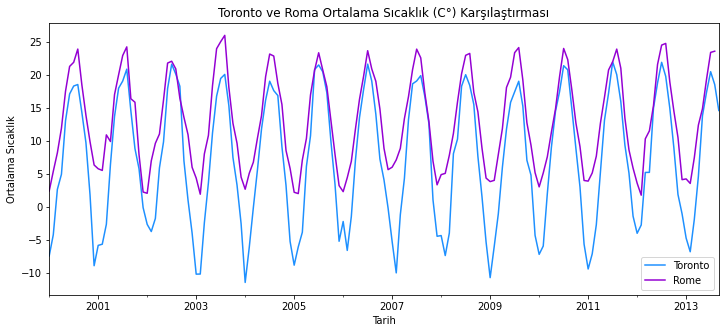

In [79]:
plt.figure(figsize= (12, 5))

# temperatures verimizden Toronto ve Rome olanları ayrı ayrı filtreleyip bu isimde yeni 
# oluşturacağımız değişkenlere atalım
toronto = temperatures[temperatures.city == "Toronto"]
rome = temperatures[temperatures.city == "Rome"]

# verimizi "date" olarak gruplayalım bunların ortalama sıcaklık değerlerinin ortalamasını mean() ile alalım 
toronto.groupby("date")["avg_temp_c"].mean().plot(kind="line", color="dodgerblue", label="Toronto")
rome.groupby("date")["avg_temp_c"].mean().plot(kind="line", color="darkviolet", label="Rome")

plt.title("Toronto ve Roma Ortalama Sıcaklık (C°) Karşılaştırması")
plt.xlabel("Tarih")
plt.ylabel("Ortalama Sıcaklık")
#plt.legend(labels=["Toronto", "Rome"])
plt.legend()
plt.show()

---
#### *Evet dördüncü yani son alt başlığımız olan "Creating and Visualizing DataFrames" ile devam edelim. Bu konu için "avocado" adlı veri setini kullanacağız.*
---

> *The Hass Avocado Kurulu, üç farklı boyutta avokado satışı da dahil olmak üzere ABD genelinde avokado arz ve talebini takip ediyor. Bu alıştırmada, hangi boyutun en popüler olduğunu bulmak için bir çubuk grafiği (bar plot) kullanacağız*

In [80]:
# İlk birkaç veri satırına bakın
avocado.head()

,date,type,year,avg_price,size,nb_sold
0,2015-12-27,conventional,2015,0.95,small,9626901.09
1,2015-12-20,conventional,2015,0.98,small,8710021.76
2,2015-12-13,conventional,2015,0.93,small,9855053.66
3,2015-12-06,conventional,2015,0.89,small,9405464.36
4,2015-11-29,conventional,2015,0.99,small,8094803.56


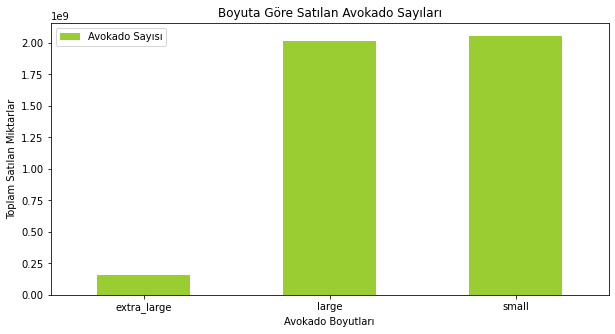

In [81]:
plt.figure(figsize= (10, 5))

# Her boyutta satılan toplam avokado sayısını hesaplayalım
nb_sold_by_size = avocado.groupby("size")["nb_sold"].sum()

# Boyuta göre satılan avokado sayısını gösteren bir çubuk grafik (bar plot) oluşturalım
nb_sold_by_size.plot(kind="bar", rot=0, title="Boyuta Göre Satılan Avokado Sayıları", xlabel="Avokado Boyutları", 
                     ylabel="Toplam Satılan Miktarlar", color="yellowgreen", label="Avokado Sayısı", legend="label",) 

# rot anahtar kelimesi rotation (döndürme) için kullanılıyor
# rot= 0 : yatay yapar
# rot= 90 : dikey yapar
# rot= 45 : 45 derece döndürür

plt.show()

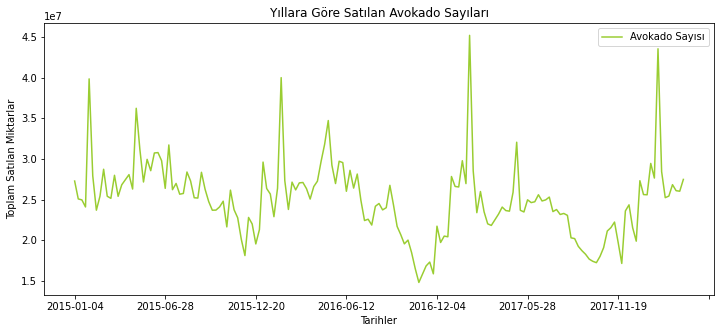

In [82]:
plt.figure(figsize= (12, 5))

# Her tarihte satılan toplam avokado sayısını hesaplayalım
nb_sold_by_date = avocado.groupby("date")["nb_sold"].sum()

# Tarihe göre satılan avokado sayısını gösteren bir çizgi grafiği (line plot) oluşturalım
nb_sold_by_date.plot(kind="line", rot=0, title="Yıllara Göre Satılan Avokado Sayıları", xlabel="Tarihler", 
                     ylabel="Toplam Satılan Miktarlar", label="Avokado Sayısı", legend="label", color="yellowgreen") 

plt.show()

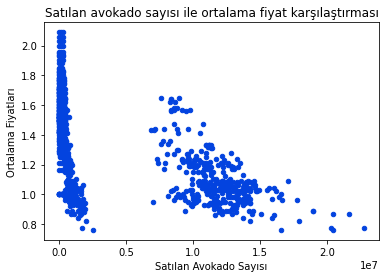

In [83]:
# avg_price ve nb_sold'un dağılım grafiğini (scatter) oluşturup karşılaştırmasını yapalım
avocado.plot(x="nb_sold", y="avg_price", kind="scatter", title="Satılan avokado sayısı ile ortalama fiyat karşılaştırması", c="#0343DF")

plt.xlabel("Satılan Avokado Sayısı")
plt.ylabel("Ortalama Fiyatları")
plt.show()

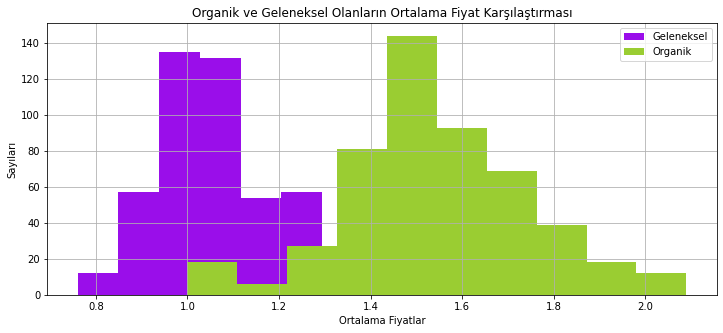

In [84]:
plt.figure(figsize= (12, 5))

# Geleneksel(Konvansiyonel) olanların ortalama fiyatlarını alıp bunun histogram grafiğini oluşturalım
avocado[avocado["type"] == "conventional"]["avg_price"].hist(color="#9A0EEA")

# Organik olanların ortalama fiyatlarını alıp bunun histogram grafiğini oluşturalım
avocado[avocado["type"] == "organic"]["avg_price"].hist(color="#9ACD32")

plt.title("Organik ve Geleneksel Olanların Ortalama Fiyat Karşılaştırması")
plt.xlabel("Ortalama Fiyatlar")
plt.ylabel("Sayıları")
plt.legend(["Geleneksel", "Organik"])

# Her ikisini tek bir grafik üzerinde görelim şimdi de
plt.show()

#### *İki dağılım arasında ne kadar örtüşme olduğunu görmek için her iki histogramın saydamlığını 0,5'e ayarlamak için kodumuzu değiştirelim.*

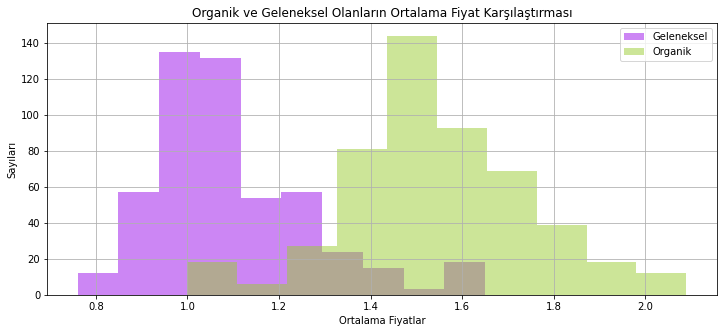

In [85]:
plt.figure(figsize= (12, 5))

# Histogram saydamlığını 0,5 olarak değiştirelim
avocado[avocado["type"] == "conventional"]["avg_price"].hist(alpha=0.5, color="#9A0EEA")

# Histogram saydamlığını 0,5 olarak değiştirelim
avocado[avocado["type"] == "organic"]["avg_price"].hist(alpha=0.5, color="#9ACD32")

plt.title("Organik ve Geleneksel Olanların Ortalama Fiyat Karşılaştırması")
plt.xlabel("Ortalama Fiyatlar")
plt.ylabel("Sayıları")
plt.legend(["Geleneksel", "Organik"])

plt.show()

#### *Her iki histogramda da 20 kutu kullanmak için kodumuzu değiştirelim.*
- bins: Histogramdaki kutu sayısı diyebiliriz."auto" değer vererek otomatik olarak da görebilirsiniz.

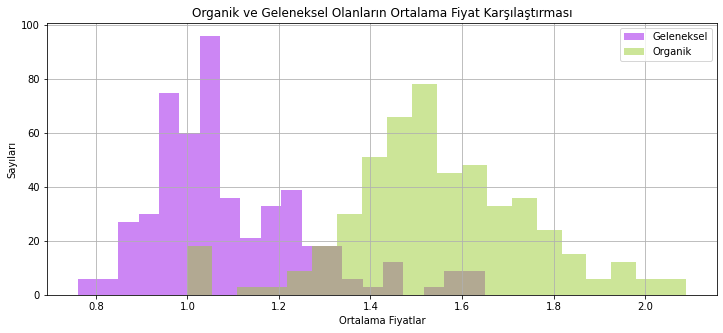

In [86]:
plt.figure(figsize= (12, 5))

# Kutuları 20 olarak değiştirelim
avocado[avocado["type"] == "conventional"]["avg_price"].hist(bins=20, alpha=0.5, color="#9A0EEA")

# Kutuları 20 olarak değiştirelim
avocado[avocado["type"] == "organic"]["avg_price"].hist(bins= 20, alpha=0.5, color="#9ACD32")

plt.title("Organik ve Geleneksel Olanların Ortalama Fiyat Karşılaştırması")
plt.xlabel("Ortalama Fiyatlar")
plt.ylabel("Sayıları")
plt.legend(["Geleneksel", "Organik"])

plt.show()

### 2017'de satılan toplam organik avokado sayısı ne kadardı? buna bir bakalım

In [87]:
# set_index ile "date" adlı sütun ismini yeni index'imiz olarak ayarlıyoruz. 
# sort_index() ile sıralamasını yapıyoruz verimizin
# loc[] ile 2017 yılı ile 2018 yılı arasındakileri getiriyoruz
avocado_2017 = avocado.set_index("date").sort_index().loc["2017":"2018"]

# loc[] ile türü organik olanları alıyoruz sadece.
avocado_organic_2017 = avocado_2017.loc[(avocado_2017["type"] == "organic")]

# Satılan toplam organik avokado sayısına bakalım
avocado_organic_2017["nb_sold"].sum()

23321281.07